In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [4]:
cust=pd.read_csv('D:/DATA SC/python/Analytix lab assignments/Python Foundation Case Study 1 - Retail Case Study/Customer.csv')
cust.rename(columns={'customer_Id':'cust_id'},inplace=True)
cust.head(2)

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [5]:
prod= pd.read_csv('D:/DATA SC/python/Analytix lab assignments/Python Foundation Case Study 1 - Retail Case Study/Prod_cat_info.csv')
prod.rename(columns= {'prod_sub_cat_code':'prod_subcat_code'},inplace= True)
prod.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [6]:
trans= pd.read_csv('D:/DATA SC/python/Analytix lab assignments/Python Foundation Case Study 1 - Retail Case Study/Transactions.csv')
trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [7]:
trans_prod= pd.merge(prod,trans,on=['prod_subcat_code','prod_cat_code'],how='outer')
trans_prod

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type
0,1,Clothing,4,Mens,28396777609,269101,19-02-2014,4,1386,582.120,6126.120,TeleShop
1,1,Clothing,4,Mens,58956348529,272484,18-02-2014,4,1443,606.060,6378.060,TeleShop
2,1,Clothing,4,Mens,83498320600,273359,18-02-2014,4,861,361.620,3805.620,e-Shop
3,1,Clothing,4,Mens,78091789730,271030,18-02-2014,1,380,39.900,419.900,e-Shop
4,1,Clothing,4,Mens,83108241933,273896,16-02-2014,2,574,120.540,1268.540,e-Shop
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,6,Home and kitchen,12,Tools,65784315637,273261,30-01-2011,5,1193,626.325,6591.325,e-Shop
23049,6,Home and kitchen,12,Tools,50288668196,271923,29-01-2011,3,371,116.865,1229.865,TeleShop
23050,6,Home and kitchen,12,Tools,32729667210,273683,28-01-2011,2,718,150.780,1586.780,e-Shop
23051,6,Home and kitchen,12,Tools,15950349936,274767,26-01-2011,1,1226,128.730,1354.730,TeleShop


In [8]:
trans_prod.transaction_id.nunique()

20878

In [9]:
trans.transaction_id.nunique()

20878

In [10]:
customer_final= pd.merge(trans_prod,cust,on='cust_id')
customer_final

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,1,Clothing,4,Mens,28396777609,269101,19-02-2014,4,1386,582.120,6126.120,TeleShop,27-06-1980,M,7.0
1,5,Books,7,Fiction,23071828666,269101,17-04-2011,5,1235,648.375,6823.375,TeleShop,27-06-1980,M,7.0
2,5,Books,10,Non-Fiction,13511219572,269101,22-03-2013,5,1498,786.450,8276.450,MBR,27-06-1980,M,7.0
3,6,Home and kitchen,10,Kitchen,16580948072,269101,17-10-2013,3,630,198.450,2088.450,TeleShop,27-06-1980,M,7.0
4,1,Clothing,4,Mens,58956348529,272484,18-02-2014,4,1443,606.060,6378.060,TeleShop,04-07-1974,F,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,6,Home and kitchen,12,Tools,33006117905,266941,22-06-2011,5,731,383.775,4038.775,e-Shop,17-08-1990,F,6.0
23049,6,Home and kitchen,12,Tools,35945678971,273265,3/6/2011,1,942,98.910,1040.910,e-Shop,12-12-1972,F,5.0
23050,6,Home and kitchen,12,Tools,5945967674,272071,30-05-2011,5,216,113.400,1193.400,Flagship store,06-04-1970,F,6.0
23051,6,Home and kitchen,12,Tools,16136391020,267732,19-04-2011,1,832,87.360,919.360,e-Shop,23-09-1989,F,9.0


## 2.Prepare Summary Reports

In [11]:
## Describing Column name  Data types

customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prod_cat_code     23053 non-null  int64  
 1   prod_cat          23053 non-null  object 
 2   prod_subcat_code  23053 non-null  int64  
 3   prod_subcat       23053 non-null  object 
 4   transaction_id    23053 non-null  int64  
 5   cust_id           23053 non-null  int64  
 6   tran_date         23053 non-null  object 
 7   Qty               23053 non-null  int64  
 8   Rate              23053 non-null  int64  
 9   Tax               23053 non-null  float64
 10  total_amt         23053 non-null  float64
 11  Store_type        23053 non-null  object 
 12  DOB               23053 non-null  object 
 13  Gender            23044 non-null  object 
 14  city_code         23045 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


In [12]:
## Top 10 Observations
customer_final.head(10)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,1,Clothing,4,Mens,28396777609,269101,19-02-2014,4,1386,582.120,6126.120,TeleShop,27-06-1980,M,7.0
1,5,Books,7,Fiction,23071828666,269101,17-04-2011,5,1235,648.375,6823.375,TeleShop,27-06-1980,M,7.0
2,5,Books,10,Non-Fiction,13511219572,269101,22-03-2013,5,1498,786.450,8276.450,MBR,27-06-1980,M,7.0
3,6,Home and kitchen,10,Kitchen,16580948072,269101,17-10-2013,3,630,198.450,2088.450,TeleShop,27-06-1980,M,7.0
4,1,Clothing,4,Mens,58956348529,272484,18-02-2014,4,1443,606.060,6378.060,TeleShop,04-07-1974,F,4.0
5,3,Electronics,4,Mobiles,31206389346,272484,19-06-2012,2,785,164.850,1734.850,Flagship store,04-07-1974,F,4.0
6,1,Clothing,4,Mens,83498320600,273359,18-02-2014,4,861,361.620,3805.620,e-Shop,05-08-1977,M,7.0
7,1,Clothing,4,Mens,55637693527,273359,22-11-2011,4,1173,492.660,5184.660,e-Shop,05-08-1977,M,7.0
8,5,Books,7,Fiction,26513784883,273359,3/12/2012,1,614,64.470,678.470,TeleShop,05-08-1977,M,7.0
9,6,Home and kitchen,11,Bath,77397626308,273359,21-11-2013,1,692,72.660,764.660,Flagship store,05-08-1977,M,7.0


In [13]:
customer_final.describe()

,prod_cat_code,prod_subcat_code,transaction_id,cust_id,Qty,Rate,Tax,total_amt,city_code
count,23053.000000,23053.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,3.763632,6.149091,5.007348e+10,271021.746497,2.432395,636.369713,248.667192,2107.308002,5.482534
std,1.677016,3.726372,2.898194e+10,2431.692059,2.268406,622.363498,187.177773,2507.561264,2.863499
min,1.000000,1.000000,3.268991e+06,266783.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.000000,3.000000,2.493864e+10,268935.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,4.000000,5.000000,5.009313e+10,270980.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,5.000000,10.000000,7.533000e+10,273114.000000,4.000000,1109.000000,365.715000,3569.150000,8.000000
max,6.000000,12.000000,9.998755e+10,275265.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


In [14]:
#### Need to know how to store the Catagotrical & Continuous columns to different list by using data types instead of doing it manually

### Frquency Table for the catagorical variables

In [15]:

cat_var= ['prod_cat','prod_subcat','Store_type','Gender','city_code']
cont_var=['Qty','total_amt','Rate','Tax']

### unable to automate this frecquency table for the catagorical variable 


In [16]:
customer_final['prod_cat'].value_counts()

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

In [17]:
customer_final['prod_subcat'].value_counts()

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Comics                 1031
Mobiles                1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

In [18]:
customer_final['Store_type'].value_counts()

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

In [19]:
customer_final['Gender'].value_counts()

M    11811
F    11233
Name: Gender, dtype: int64

In [20]:
customer_final['city_code'].value_counts()

4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: city_code, dtype: int64

In [21]:
## frequency table using group by 
cat_var1= ['prod_cat','prod_subcat','Store_type']
customer_final.groupby (cat_var1).size().reset_index(name='count')

,prod_cat,prod_subcat,Store_type,count
0,Bags,Mens,Flagship store,193
1,Bags,Mens,MBR,204
2,Bags,Mens,TeleShop,213
3,Bags,Mens,e-Shop,393
4,Bags,Women,Flagship store,196
...,...,...,...,...
87,Home and kitchen,Kitchen,e-Shop,400
88,Home and kitchen,Tools,Flagship store,194
89,Home and kitchen,Tools,MBR,196
90,Home and kitchen,Tools,TeleShop,210


In [22]:
def frequency_table(x):
    print("Frequency Table for - ",x.name)
    sns.countplot(y=x,data= customer_final,orient='h',hue='Gender')
    plt.show()
### how to automate to plot catagorical varialbe count plot

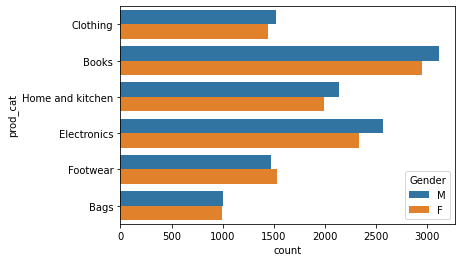

In [23]:
sns.countplot(y='prod_cat',data= customer_final,orient='h',hue='Gender')
plt.show()
## hue used to understand the interest of buying a catagorical item 

In [24]:
cat_df = customer_final[cat_var]
cat_df.head(2)
cont_df=customer_final[cont_var]
cont_df.head(2)

,Qty,total_amt,Rate,Tax
0,4,6126.120,1386,582.120
1,5,6823.375,1235,648.375


Frequency Table for -  prod_cat


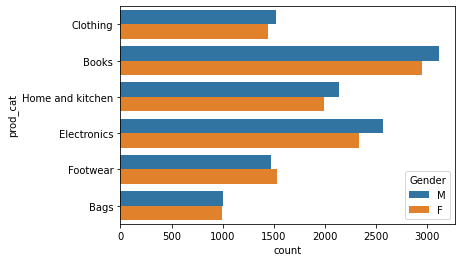

Frequency Table for -  prod_subcat


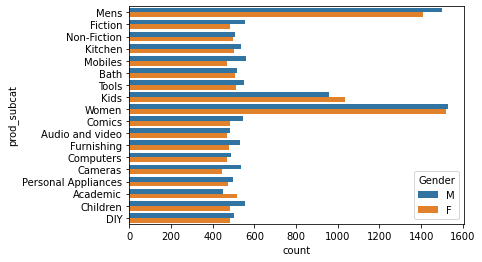

Frequency Table for -  Store_type


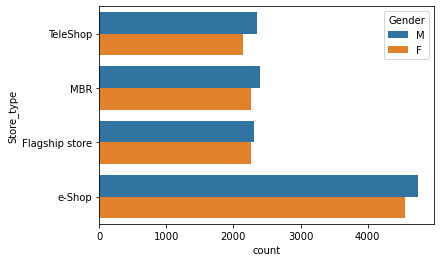

Frequency Table for -  Gender


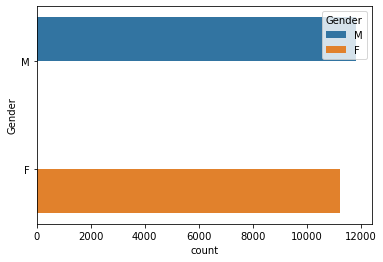

Frequency Table for -  city_code


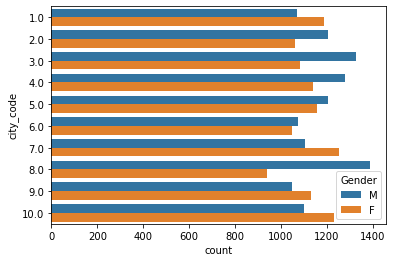

prod_cat       None
prod_subcat    None
Store_type     None
Gender         None
city_code      None
dtype: object

In [25]:
## Automated the Plot for all the catagorical variable

customer_final[cat_var].apply(frequency_table)

<AxesSubplot:xlabel='count', ylabel='Store_type'>

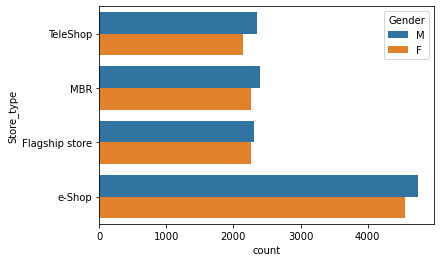

In [26]:
sns.countplot(y='Store_type',data= customer_final,orient='h',hue='Gender')

<AxesSubplot:xlabel='count', ylabel='prod_subcat'>

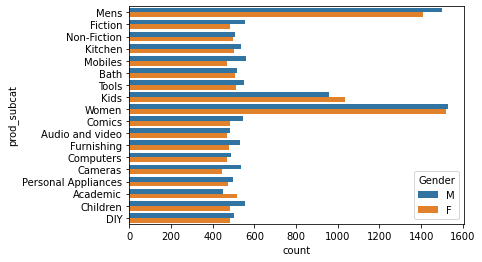

In [27]:
sns.countplot(y='prod_subcat',data= customer_final,orient='h',hue='Gender')

### Histograms for Continuous Variable

In [28]:
def histogram(x):
    print("Frequency Table for - ",x.name)
    x.hist()
    plt.show()

Frequency Table for -  Qty


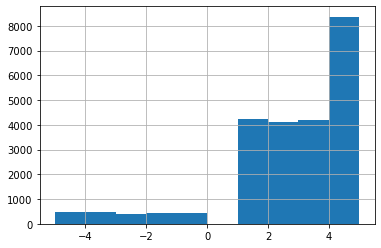

Frequency Table for -  total_amt


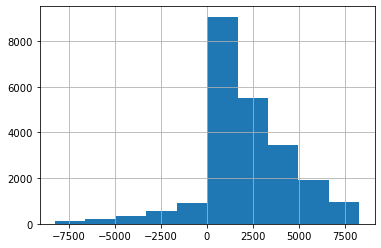

Frequency Table for -  Rate


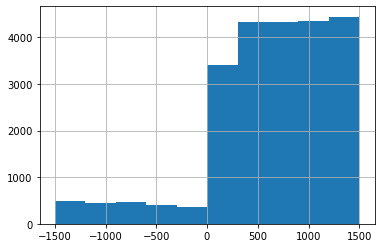

Frequency Table for -  Tax


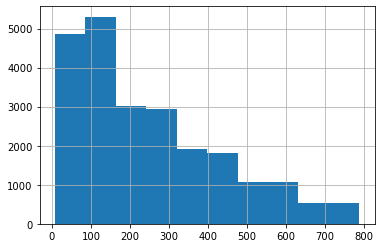

Qty          None
total_amt    None
Rate         None
Tax          None
dtype: object

In [29]:
customer_final[cont_var].apply(histogram)

In [30]:
customer_final.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,1,Clothing,4,Mens,28396777609,269101,19-02-2014,4,1386,582.120,6126.120,TeleShop,27-06-1980,M,7.0
1,5,Books,7,Fiction,23071828666,269101,17-04-2011,5,1235,648.375,6823.375,TeleShop,27-06-1980,M,7.0


In [31]:
customer_final['tran_date']= pd.to_datetime(customer_final['tran_date'])
customer_final['DOB']= pd.to_datetime(customer_final['DOB'])
customer_final.info()

C:\Users\HP\AppData\Local\Temp\ipykernel_18280\1481285685.py:1: UserWarning: Parsing '19-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final['tran_date']= pd.to_datetime(customer_final['tran_date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_18280\1481285685.py:1: UserWarning: Parsing '17-04-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final['tran_date']= pd.to_datetime(customer_final['tran_date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_18280\1481285685.py:1: UserWarning: Parsing '22-03-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final['tran_date']= pd.to_datetime(customer_final['tran_date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_18280\1481285685.py:1: UserWarning: Parsing '17-10-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consist

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   prod_cat_code     23053 non-null  int64         
 1   prod_cat          23053 non-null  object        
 2   prod_subcat_code  23053 non-null  int64         
 3   prod_subcat       23053 non-null  object        
 4   transaction_id    23053 non-null  int64         
 5   cust_id           23053 non-null  int64         
 6   tran_date         23053 non-null  datetime64[ns]
 7   Qty               23053 non-null  int64         
 8   Rate              23053 non-null  int64         
 9   Tax               23053 non-null  float64       
 10  total_amt         23053 non-null  float64       
 11  Store_type        23053 non-null  object        
 12  DOB               23053 non-null  datetime64[ns]
 13  Gender            23044 non-null  object        
 14  city_code         2304

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-05-1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-06-1976' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-04-1989' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-09-1972' in DD/MM/YYYY format. Provide format or specify infer_date

In [32]:
Start_dt=customer_final['tran_date'].min()
last_dt= customer_final['tran_date'].max()
print('Data available from- '+pd.Timestamp.strftime(Start_dt,format="%d-%m-%Y")+ 'to' +pd.Timestamp.strftime(last_dt,format="%d-%m-%Y"))

Data available from- 02-01-2011to02-12-2014


In [33]:
customer_final.loc[customer_final['total_amt']<0,'transaction_id'].count()

2177

### Analyze which product catagory more popular among male  female

In [34]:
cat_table = pd.pivot_table(data=customer_final,index=["prod_cat","Gender"],aggfunc= 'count',values='transaction_id')
cat_table

transaction_id
prod_cat         Gender                
Bags             F                  994
                 M                 1004
Books            F                 2949
                 M                 3116
Clothing         F                 1439
                 M                 1518
Electronics      F                 2328
                 M                 2570
Footwear         F                 1529
                 M                 1469
Home and kitchen F                 1994
                 M                 2134

In [35]:
city_wise_transaction = pd.pivot_table(data=customer_final,index=["city_code"],aggfunc= 'count',values='cust_id')
city_wise_transaction['Percentage']= city_wise_transaction['cust_id']/city_wise_transaction['cust_id'].sum()*100
city_wise_transaction.sort_values(by=['Percentage'])

,cust_id,Percentage
city_code,,
6.0,2127,9.229768
9.0,2178,9.451074
1.0,2258,9.798221
2.0,2270,9.850293
8.0,2330,10.110653
10.0,2333,10.123671
7.0,2356,10.223476
5.0,2360,10.240833
3.0,2411,10.462139


### which stores sells maximum qty wise and value wise

In [36]:
stores_table = pd.pivot_table(data=customer_final,index=["Store_type"],aggfunc= 'sum',values=['Qty','total_amt'])
stores_table.sort_values(by=['total_amt'],ascending= False)

,Qty,total_amt
Store_type,,
e-Shop,22763,1.982482e+07
Flagship store,11133,9.715688e+06
MBR,11194,9.674486e+06
TeleShop,10984,9.364781e+06


### What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [37]:
stores_catagory_sales = pd.pivot_table(data=customer_final,index=["prod_cat"],aggfunc= 'sum',values='total_amt',columns='Store_type')
flagship_stores= pd.DataFrame(stores_catagory_sales.loc[['Electronics','Clothing'],'Flagship store'])
flagship_stores

,Flagship store
prod_cat,
Electronics,2215136.04
Clothing,1194423.23


### What was the total amount earned from "Male" customers under the "Electronics" category?

In [58]:
catagory_sales = pd.DataFrame(pd.pivot_table(data=customer_final,index=["prod_cat",'Gender'],aggfunc= 'sum',values=['total_amt'])).reset_index()
catagory_sales_electronics= catagory_sales.loc[(catagory_sales["prod_cat"]=='Electronics')].reset_index()
catagory_sales_electronics_Male= catagory_sales_electronics.loc[catagory_sales_electronics['Gender']=='M']
catagory_sales_electronics_Male

,index,prod_cat,Gender,total_amt
1,7,Electronics,M,5703109.425


In [63]:
### Possitive transaction ----

pos_trans = customer_final.loc[customer_final["total_amt"]>0,:]
pos_trans.head(5)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,1,Clothing,4,Mens,28396777609,269101,2014-02-19,4,1386,582.120,6126.120,TeleShop,1980-06-27,M,7.0
1,5,Books,7,Fiction,23071828666,269101,2011-04-17,5,1235,648.375,6823.375,TeleShop,1980-06-27,M,7.0
2,5,Books,10,Non-Fiction,13511219572,269101,2013-03-22,5,1498,786.450,8276.450,MBR,1980-06-27,M,7.0
3,6,Home and kitchen,10,Kitchen,16580948072,269101,2013-10-17,3,630,198.450,2088.450,TeleShop,1980-06-27,M,7.0
4,1,Clothing,4,Mens,58956348529,272484,2014-02-18,4,1443,606.060,6378.060,TeleShop,1974-04-07,F,4.0


### How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [64]:
uniqu_trans = pd.DataFrame(pos_trans.groupby(['cust_id','prod_cat','prod_subcat'])['transaction_id'].count())
uniqu_trans_above_Ten = pd.DataFrame(uniqu_trans.groupby(['cust_id'])['transaction_id'].count())
uniqu_trans_above_Ten[uniqu_trans_above_Ten['transaction_id']>10]

,transaction_id
cust_id,


### What was the total amount spent for “Electronics” and “Books” product categories?

In [65]:
now = pd.Timestamp('now')
customer_final['DOB']= customer_final['DOB']= pd.to_datetime(customer_final['DOB'],format="%d-%m-%Y")
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y')) 
customer_final['age'] = (now - customer_final['DOB']).astype('<m8[Y]') ### Need better understanding
customer_final.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,age
0,1,Clothing,4,Mens,28396777609,269101,2014-02-19,4,1386,582.120,6126.120,TeleShop,1980-06-27,M,7.0,42.0
1,5,Books,7,Fiction,23071828666,269101,2011-04-17,5,1235,648.375,6823.375,TeleShop,1980-06-27,M,7.0,42.0


In [67]:
customer_final['Age_grp']= pd.cut(customer_final["age"],bins=[24,35,70],labels= ['25-35 Age','Above 35'])
customer_final.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,age,Age_grp
0,1,Clothing,4,Mens,28396777609,269101,2014-02-19,4,1386,582.120,6126.120,TeleShop,1980-06-27,M,7.0,42.0,Above 35
1,5,Books,7,Fiction,23071828666,269101,2011-04-17,5,1235,648.375,6823.375,TeleShop,1980-06-27,M,7.0,42.0,Above 35


In [86]:
## Catagorywise & age group wise BOOKS & Electronics Purchase

Mid_age_sale= pd.DataFrame(customer_final.groupby(['prod_cat','Age_grp'])['total_amt'].sum()).reset_index()
Mid_age_sale.loc[(Mid_age_sale['prod_cat']=='Electronics')| (Mid_age_sale['prod_cat']== 'Books'),['prod_cat','Age_grp','total_amt',]]


,prod_cat,Age_grp,total_amt
2,Books,25-35 Age,3174082.665
3,Books,Above 35,9648611.375
6,Electronics,25-35 Age,2883920.715
7,Electronics,Above 35,7838542.920


In [87]:
Mid_age_sale_25_to_35 =customer_final[customer_final["Age_grp"]=='25-35 Age']
Mid_age_sale_25_to_35.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,age,Age_grp
26,1,Clothing,4,Mens,6801834681,273174,2014-02-13,1,642,67.410,709.410,Flagship store,1989-04-18,F,2.0,33.0,25-35 Age
27,6,Home and kitchen,2,Furnishing,10965401049,273174,2011-10-11,5,105,55.125,580.125,e-Shop,1989-04-18,F,2.0,33.0,25-35 Age


In [88]:
Mid_age_2014 = Mid_age_sale_25_to_35[(Mid_age_sale_25_to_35['tran_date'] >='2014-01-01') & (Mid_age_sale_25_to_35['tran_date'] <='2014-03-01')]
Mid_age_2014['total_amt'].sum() ## the total sale by age group 25-5 between 1st Jan,2014 to 1st Mat,2014

428230.5950000001